<a href="https://colab.research.google.com/github/divyaprabha123/ATOM/blob/master/SIH_Road_Damage_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Road Damage Detection

In [0]:
import sys
sys.path.append("/content/RoadDamageDetector/")
!git clone https://github.com/divyaprabha123/ATOM

In [0]:
import numpy as np
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

if tf.__version__ != '1.4.1':
  raise ImportError('Please upgrade your tensorflow installation to v1.4.1!')

from utils import label_map_util

from utils import visualization_utils as vis_util

In [0]:
!pip install tensorflow==1.4.1

In [0]:
from google.colab import drive
drive.mount('/content/drive')

![alt text](https://drive.google.com/uc?id=1MiaRqHoFel01ZpCmvY3T8VZHpHe6oyO2)

In [0]:
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT =  '/content/RoadDamageDetector/ssd_mobilenet_RoadDamageDetector.pb' 

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/RoadDamageDetector/crack_label_map.pbtxt'

NUM_CLASSES = 8

In [0]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [0]:
def detect(test_image, plot_show = False):
  detection_graph = tf.Graph()
  with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
      serialized_graph = fid.read()
      od_graph_def.ParseFromString(serialized_graph)
      tf.import_graph_def(od_graph_def, name='')

  label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
  categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
  category_index = label_map_util.create_category_index(categories)
  print(type(test_image))
  #INPUT FILE
  if str(type(test_image))!="<class 'list'>":
    TEST_IMAGE_PATHS=[test_image]  
  else:
    TEST_IMAGE_PATHS=test_image
  IMAGE_SIZE = (12, 8)
  final_images,boxes_collect,scores_collect,classes_collect,num_collect = [],[],[],[],[]
  with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
      # Definite input and output Tensors for detection_graph
      image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
      # Each box represents a part of the image where a particular object was detected.
      detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
      # Each score represent how level of confidence for each of the objects.
      # Score is shown on the result image, together with the class label.
      detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
      detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
      num_detections = detection_graph.get_tensor_by_name('num_detections:0')
      for image_path in TEST_IMAGE_PATHS:
        image = Image.open(image_path)
        # the array based representation of the image will be used later in order to prepare the
        # result image with boxes and labels on it.
        image_np = load_image_into_numpy_array(image)
        # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
        image_np_expanded = np.expand_dims(image_np, axis=0)
        # Actual detection.
        (boxes, scores, classes, num) = sess.run(
            [detection_boxes, detection_scores, detection_classes, num_detections],
            feed_dict={image_tensor: image_np_expanded})
        # Visualization of the results of a detection.
        vis_util.visualize_boxes_and_labels_on_image_array(
            image_np,
            np.squeeze(boxes),
            np.squeeze(classes).astype(np.int32),
            np.squeeze(scores),
            category_index,
            min_score_thresh=0.4,
            use_normalized_coordinates=True,
            line_thickness=8)
        if plot_show == True:
          plt.figure(figsize=IMAGE_SIZE)
          plt.imshow(image_np)
        final_images.append(image_np)
        boxes_collect.append(boxes)
        scores_collect.append(scores)
        classes_collect.append(classes)
        num_collect.append(num)

  return image_np,boxes_collect,scores_collect,classes_collect,num_collect 

In [0]:
image_np,*_ = detect("/content/test_image (4).jpg")

<class 'str'>


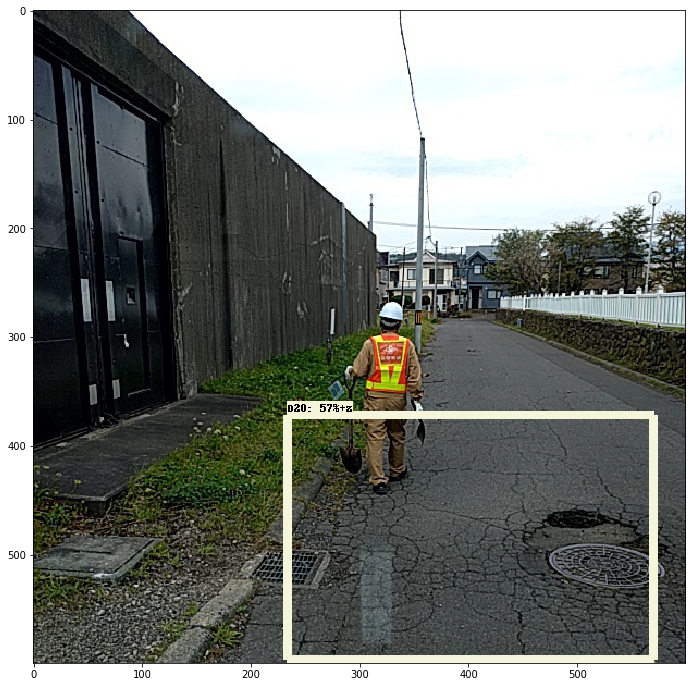

In [0]:
plt.figure(figsize=(12,12))
plt.imshow(image_np)

In [0]:
image_np,boxes_collect,scores_collect,classes_collect,num_collect  = detect("/content/14.jpg")

<class 'str'>


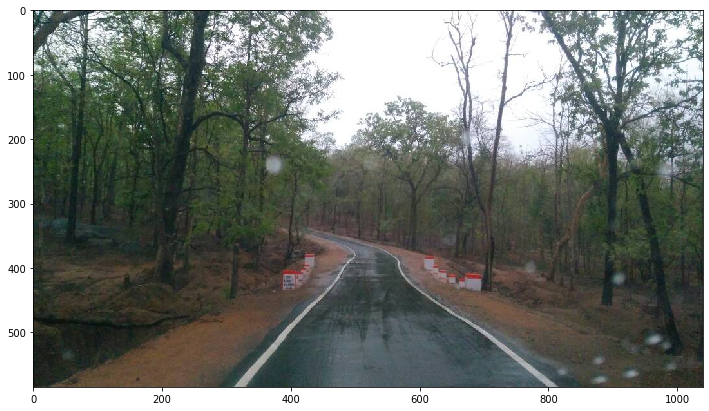

In [0]:
plt.figure(figsize=(12,12))
plt.imshow(image_np)

In [0]:
image_np,boxes_collect,scores_collect,classes_collect,num_collect  = detect("/content/15.jpg")

<class 'str'>


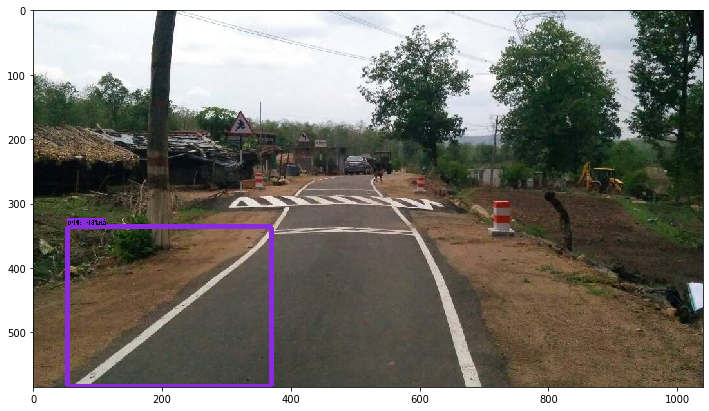

In [0]:
plt.figure(figsize=(12,12))
plt.imshow(image_np)

In [0]:
image_np,boxes_collect,scores_collect,classes_collect,num_collect  = detect("/content/16.jpg")

<class 'str'>


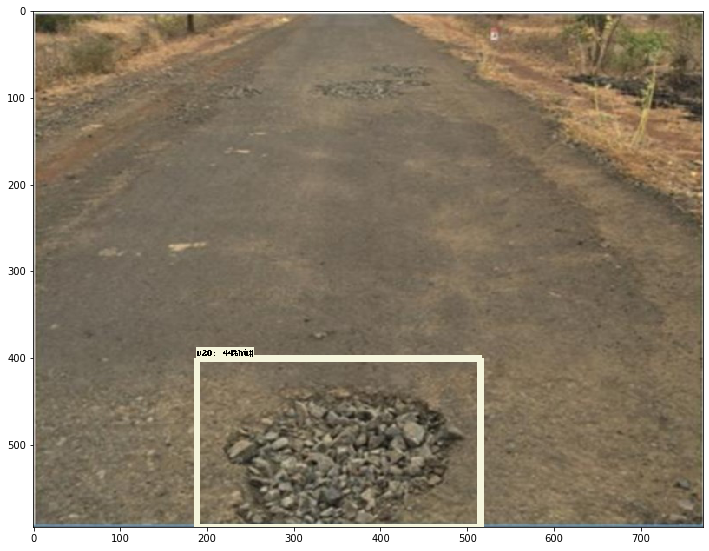

In [0]:
plt.figure(figsize=(12,12))
plt.imshow(image_np)